<a href="https://colab.research.google.com/gist/jonghank/e6a7672500afe860b78400fde428deb2/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least squares classification

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE2030: Linear algebra and statistics, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

---
## Handwritten image classifier

The following cell downloads a data set that contains 10,000 handwritten images ($n=10000$) with correct label for each image. Each image is made of 28x28 grayscale pixels ($m=28$) and the label is given by an integer from 0 to 9, so we represents the $n$-th data pair by $X^{(n)}\in\R^{m\times m}$ (image) and $y^{(n)} \in \{0,1,\dots,9\}$ (label). 

We will use some of these data pairs to train our model. The model is simply a python function, that receives an $m\times m$ grayscale image as input and returns what the input image looks closest among the integers from 0 to 9. What we mean by "to train" is to find appropriate parameters of the model function based on the data pairs that we use for training.

Note that $X^{(n)}\in\R^{m\times m}$ and $y^{(n)}$ are accessible by `X[:,:,n]` and `y[n]` below.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://jonghank.github.io/ee370/files/numbers.csv', \
                 header=None).values

m = 28     # 28x28: image size
K = 10     # 10: each image represents one of 10 digits
N = 10000  # 10000: number of images in the train set

y = data[:,0]
X = np.zeros((m,m,N))
for n in range(N):
  X[:,:,n] = data[n,1:].reshape((m,m))
  
print(X.shape, y.shape)

(28, 28, 10000) (10000,)


<br>

For example, the first 12 images and the labels from the dataset are shown below. You can check if they coincide.

First 12 images:



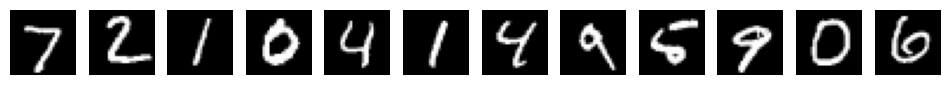

First 12 label:
[7 2 1 0 4 1 4 9 5 9 0 6]


In [2]:
n_examples = 12
print(f'First {n_examples} images:\n')
plt.figure(figsize=(12,4), dpi=100)
for n in range(n_examples):
  plt.subplot(1,n_examples,n+1)
  plt.imshow(X[:,:,n], cmap='gray')
  plt.axis('off')
plt.show()

print(f'First {n_examples} label:\n{y[:n_examples]}')

<br>

The following splits the data set into the train set and the validation set (7:3). The first 12 images from the validation set are shown below. 

First 12 images in the validation set:



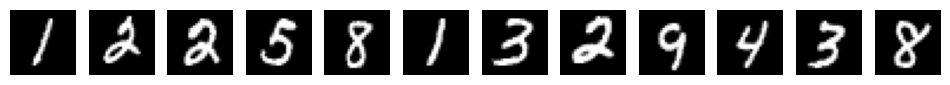

In [3]:
N_train = 7000
N_valid = 3000
X_train = X[:,:,:7000]
y_train = y[:7000]
X_valid = X[:,:,7000:]
y_valid = y[7000:]

n_examples = 12
print(f'First {n_examples} images in the validation set:\n')
plt.figure(figsize=(12,4), dpi=100)
for n in range(n_examples):
  plt.subplot(1,n_examples,n+1)
  plt.imshow(X_valid[:,:,n], cmap='gray')
  plt.axis('off')
plt.show()

<br>

## Binary classifier

Classifying the digit '0'. The train data set and the validation set are preprocessed below.

In [4]:
K = 2 

A_train = np.ones((N_train,1+m*m))
b_train = -np.ones(N_train, dtype=int)
for i in range(N_train):
  A_train[i,:] = np.hstack((1,X_train[:,:,i].flatten()))
  if y_train[i] == 0:
    b_train[i] = 1 

A_valid = np.ones((N_valid,1+m*m))
b_valid = -np.ones(N_valid, dtype=int)
for i in range(N_valid):
  A_valid[i,:] = np.hstack((1,X_valid[:,:,i].flatten()))
  if y_valid[i] == 0:
    b_valid[i] = 1 

<br>

Optimal classifier parameters and the predictions:

In [5]:
theta_opt = np.linalg.lstsq(A_train, b_train, rcond=None)[0]
b_pred_train = np.round(np.sign(A_train@theta_opt))
b_pred_valid = np.round(np.sign(A_valid@theta_opt))

<br>

Confusion matrix on the train set:

In [6]:
C = np.zeros((K,K), dtype=int)

for n in range(N_train):
  if b_pred_train[n] == 1:
    if b_train[n]==1:
      C[0,0] += 1
    else:
      C[1,0] += 1
  else:
    if b_train[n]==1:
      C[0,1] += 1
    else:
      C[1,1] += 1

np.set_printoptions(precision=2)
print(f'Confusion matrix (train):\n{C}\n')
print(f'Error rate (train):\n{100-np.sum(np.diag(C))/N_train*100:.2f} percent\n')

Confusion matrix (train):
[[ 621   51]
 [  25 6303]]

Error rate (train):
1.09 percent



<br>

and the confusion matrix on the validation set:

In [7]:
C = np.zeros((K,K), dtype=int)

for n in range(N_valid):
  if b_pred_valid[n] == 1:
    if b_valid[n]==1:
      C[0,0] += 1
    else:
      C[1,0] += 1
  else:
    if b_valid[n]==1:
      C[0,1] += 1
    else:
      C[1,1] += 1

np.set_printoptions(precision=2)
print(f'Confusion matrix (validation):\n{C}\n')
print(f'Error rate (validation):\n{100-np.sum(np.diag(C))/N_valid*100:.2f} percent\n')


Confusion matrix (validation):
[[ 281   27]
 [  11 2681]]

Error rate (validation):
1.27 percent



<br>

## Multiclass classifier

Designs a multiclass classifier that tells what the input image looks most like one of the digits '0', '1',...,'9'.

Preprocessing first:

In [8]:
K = 10

A_train = np.ones((N_train,1+m*m))
b_train = -np.ones((N_train,K), dtype=int)
for i in range(N_train):
  A_train[i,:] = np.hstack((1,X_train[:,:,i].flatten()))
  for j in range(K):
    if y_train[i] == j:
      b_train[i,j] = 1 

A_valid = np.ones((N_valid,1+m*m))
b_valid = -np.ones((N_valid,K), dtype=int)
for i in range(N_valid):
  A_valid[i,:] = np.hstack((1,X_valid[:,:,i].flatten()))
  for j in range(K):
    if y_valid[i] == j:
      b_valid[i,j] = 1 

The predictor parameter $\hat{\theta}$ is $785\times 10$, where the $k$-th column of $\theta$ represents the predictor parameter for the $k$-th digit prediction, so

$$
  \tilde{f}_k(x^{(i)}) = ( x^{(i)} )^T\theta_k 
$$

and will choose the final prediction $\hat{f}(x^{(i)})=l$ so that $\tilde{f}_l(x^{(i)})$ is the largest among $\tilde{f}_0(x^{(i)}),\tilde{f}_1(x^{(i)}),\dots, \tilde{f}_9(x^{(i)})$:

$$
  \hat{f}(x^{(i)}) = \underset{l\in\{1,\dots,K\}}{\text{argmax}} \tilde{f}_l( x^{(i)} ) 
$$

In [9]:
theta_opt = np.linalg.lstsq(A_train, b_train, rcond=None)[0]
b_pred_train = np.argmax(A_train@theta_opt, axis=1)
b_pred_valid = np.argmax(A_valid@theta_opt, axis=1)

<br>

Confusion matrices on both the train set and the validation set:

In [10]:
C = np.zeros((K,K), dtype=int)
for n in range(N_train):
  C[b_pred_train[n], y_train[n]] += 1

np.set_printoptions(precision=2)
print(f'Confusion matrix (train):\n{C}\n')
print(f'Error rate (train):\n{100-np.sum(np.diag(C))/N_train*100:.2f} percent\n')

C = np.zeros((K,K), dtype=int)
for n in range(N_valid):
  C[b_pred_valid[n], y_valid[n]] += 1

np.set_printoptions(precision=2)
print(f'Confusion matrix (validation):\n{C}\n')
print(f'Error rate (validation):\n{100-np.sum(np.diag(C))/N_valid*100:.2f} percent\n')


Confusion matrix (train):
[[649   0  10   2   0  13  13   5  13  14]
 [  0 773  19   9  13  10   6  30  23  14]
 [  0   5 635  15   3   3   3   8   7   0]
 [  4   0  13 623   0  33   1   4  22  10]
 [  1   3   9   5 646  20   5  13  10  50]
 [  4   0   0  13   2 503   9   1  14   1]
 [  6   4  13   2   3  13 613   1   8   1]
 [  1   1  11  12   1  12   0 619   6  31]
 [  6   8  18  13   7  20   6   3 569  11]
 [  1   1   1   8  25   6   0  28  10 587]]

Error rate (train):
11.19 percent

Confusion matrix (validation):
[[290   0   8   2   0   3   3   1   2   1]
 [  0 308   4   3   2   9   0   2   9   1]
 [  3   8 248  26   0   1   5   7   2   0]
 [  1   0   7 240   0   4   6   1   6   2]
 [  3   1   8   0 256  11   0   5   2  23]
 [  6   0   3   8   5 209   4   0  29   3]
 [  4   0   3   0   6   6 281   0   2   0]
 [  0   0   5   5   0   1   0 290   2  42]
 [  1  23   9  11   7  15   3   2 226   4]
 [  0   0   8  13   6   0   0   8  12 214]]

Error rate (validation):
14.60 percent



### Additional random features

We enhance the multiclass classification performance by adding the following random features. The additional features are random sums and subtractions of the existing features, so the augmented feature vector for the $i$-th data is:

$$
  x^{(i)} \longleftarrow \bmat{x^{(i)} \\ \max(Rx^{(i)},0)}
$$

where $R$ is $1000\times 785$ filled with random $1$'s and $-1$'s.

Feature engineering on the test set and the validation set:

In [11]:
n_plus = 1000
R = np.sign(np.random.randn(n_plus,1+m*m))

A_train = np.ones((N_train,1+m*m))
b_train = -np.ones((N_train,K), dtype=int)
for i in range(N_train):
  A_train[i,:] = np.hstack((1,X_train[:,:,i].flatten()))
  for j in range(K):
    if y_train[i] == j:
      b_train[i,j] = 1 

Aa_train = np.ones((N_train,1+m*m+n_plus))
for i in range(N_train):
  Aa_train[i,:] = np.hstack((A_train[i,:],np.maximum(R@A_train[i,:],0)))

A_valid = np.ones((N_valid,1+m*m))
b_valid = -np.ones((N_valid,K), dtype=int)
for i in range(N_valid):
  A_valid[i,:] = np.hstack((1,X_valid[:,:,i].flatten()))
  for j in range(K):
    if y_valid[i] == j:
      b_valid[i,j] = 1 

Aa_valid = np.ones((N_valid,1+m*m+n_plus))
for i in range(N_valid):
  Aa_valid[i,:] = np.hstack((A_valid[i,:],np.maximum(R@A_valid[i,:],0)))

<br>

Optimal classifier parameter and the predictions on the train set and the validation set:

In [12]:
theta_opt = np.linalg.lstsq(Aa_train, b_train, rcond=None)[0]
b_pred_train = np.argmax(Aa_train@theta_opt, axis=1)
b_pred_valid = np.argmax(Aa_valid@theta_opt, axis=1)

<br> 

Confusion matrices:

In [13]:
C = np.zeros((K,K), dtype=int)
for n in range(N_train):
  C[b_pred_train[n], y_train[n]] += 1

np.set_printoptions(precision=2)
print(f'Confusion matrix (train):\n{C}\n')
print(f'Error rate (train):\n{100-np.sum(np.diag(C))/N_train*100:.2f} percent\n')

C = np.zeros((K,K), dtype=int)
for n in range(N_valid):
  C[b_pred_valid[n], y_valid[n]] += 1

np.set_printoptions(precision=2)
print(f'Confusion matrix (validation):\n{C}\n')
print(f'Error rate (validation):\n{100-np.sum(np.diag(C))/N_valid*100:.2f} percent\n')


Confusion matrix (train):
[[669   0   1   0   0   0   1   0   0   3]
 [  0 791   0   0   0   0   3   7   1   4]
 [  0   1 723   0   0   0   0   1   0   0]
 [  0   0   0 695   0   3   0   0   2   4]
 [  0   1   2   0 693   1   0   2   1   2]
 [  0   0   0   0   0 627   2   0   0   0]
 [  1   1   0   0   0   0 650   0   2   0]
 [  1   0   1   3   0   0   0 699   0   0]
 [  1   0   2   4   1   2   0   0 674   2]
 [  0   1   0   0   6   0   0   3   2 704]]

Error rate (train):
1.07 percent

Confusion matrix (validation):
[[302   0   4   1   0   3   1   0   1   1]
 [  0 335   1   0   1   0   0   1   2   0]
 [  1   0 266   6   1   2   1   5   0   0]
 [  0   0   3 277   0   7   0   1   1   0]
 [  0   0   5   0 269   1   5   1   1   4]
 [  1   0   1   6   0 238   6   0   9   2]
 [  3   0   0   0   0   4 285   1   2   0]
 [  0   0   8   0   0   0   2 306   1   8]
 [  1   5   9  12   3   4   1   0 270   2]
 [  0   0   6   6   8   0   1   1   5 273]]

Error rate (validation):
5.97 percent

